### Import and prepare data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Credit_One.csv')
credit = df

In [3]:
credit.head()

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [4]:
columns = {"MyUnknownColumn": "ID", "X1": "LIMIT_BAL", "X2": "SEX", "X3": "EDUCATION", "X4": "MARRIAGE",
           "X5": "AGE", "X6": "PMT_SEPT", "X7": "PMT_AUG", "X8": "PMT_JUL", "X9": "PMT_JUN",
           "X10": "PMT_MAY", "X11": "PMT_APR", "X12": "BILL_SEPT", "X13": "BILL_AUG",
           "X14": "BILL_JUL", "X15": "BILL_JUN", "X16": "BILL_MAY", "X17": "BILL_APR",
           "X18": "PREV_PMT_SEPT", "X19": "PREV_PMT_AUG", "X20": "PREV_PMT_JUL", "X21": "PREV_PMT_JUN",
           "X22": "PREV_PMT_MAY", "X23": "PREV_PMT_APR", "Y": "CLIENT_BEHAVIOR"}
credit = credit.rename(columns=columns)[1:]

In [5]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PMT_SEPT,PMT_AUG,PMT_JUL,PMT_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PREV_PMT_SEPT,PREV_PMT_AUG,PREV_PMT_JUL,PREV_PMT_JUN,PREV_PMT_MAY,PREV_PMT_APR,CLIENT_BEHAVIOR
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


### Pandas Profiling

In [6]:
import pandas_profiling

In [7]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Cleaning

In [8]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PMT_SEPT,PMT_AUG,PMT_JUL,PMT_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PREV_PMT_SEPT,PREV_PMT_AUG,PREV_PMT_JUL,PREV_PMT_JUN,PREV_PMT_MAY,PREV_PMT_APR,CLIENT_BEHAVIOR
count,30202,30203,30203,30203,30203,30203,30203,30203,30203,30203,...,30203,30203,30203,30203,30203,30203,30203,30203,30203,30203
unique,30001,83,4,6,6,58,13,13,13,13,...,21550,21012,20606,7945,7901,7520,6939,6899,6941,4
top,1,50000,female,university,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,2,3397,18217,14107,16088,1619,14828,15830,15863,16566,...,3218,3530,4045,5287,5437,6007,6450,6744,7233,23519


In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               30202 non-null  object
 1   LIMIT_BAL        30203 non-null  object
 2   SEX              30203 non-null  object
 3   EDUCATION        30203 non-null  object
 4   MARRIAGE         30203 non-null  object
 5   AGE              30203 non-null  object
 6   PMT_SEPT         30203 non-null  object
 7   PMT_AUG          30203 non-null  object
 8   PMT_JUL          30203 non-null  object
 9   PMT_JUN          30203 non-null  object
 10  PMT_MAY          30203 non-null  object
 11  PMT_APR          30203 non-null  object
 12  BILL_SEPT        30203 non-null  object
 13  BILL_AUG         30203 non-null  object
 14  BILL_JUL         30203 non-null  object
 15  BILL_JUN         30203 non-null  object
 16  BILL_MAY         30203 non-null  object
 17  BILL_APR         30203 non-null

Perform dataset query on the quotes in the error.

In [10]:
credit[credit['LIMIT_BAL'] == "X1"]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PMT_SEPT,PMT_AUG,PMT_JUL,PMT_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PREV_PMT_SEPT,PREV_PMT_AUG,PREV_PMT_JUL,PREV_PMT_JUN,PREV_PMT_MAY,PREV_PMT_APR,CLIENT_BEHAVIOR
202,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y


In [11]:
credit[credit['LIMIT_BAL'] == "LIMIT_BAL"]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PMT_SEPT,PMT_AUG,PMT_JUL,PMT_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PREV_PMT_SEPT,PREV_PMT_AUG,PREV_PMT_JUL,PREV_PMT_JUN,PREV_PMT_MAY,PREV_PMT_APR,CLIENT_BEHAVIOR
203,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [12]:
credit.drop([202, 203], axis=0, inplace=True)

### Data Transformation

In [13]:
credit = credit.apply(pd.to_numeric, errors='ignore')

In [14]:
credit.dtypes

ID                  int64
LIMIT_BAL           int64
SEX                object
EDUCATION          object
MARRIAGE            int64
AGE                 int64
PMT_SEPT            int64
PMT_AUG             int64
PMT_JUL             int64
PMT_JUN             int64
PMT_MAY             int64
PMT_APR             int64
BILL_SEPT           int64
BILL_AUG            int64
BILL_JUL            int64
BILL_JUN            int64
BILL_MAY            int64
BILL_APR            int64
PREV_PMT_SEPT       int64
PREV_PMT_AUG        int64
PREV_PMT_JUL        int64
PREV_PMT_JUN        int64
PREV_PMT_MAY        int64
PREV_PMT_APR        int64
CLIENT_BEHAVIOR    object
dtype: object

### One Hot Encoding

In [15]:
credit = pd.get_dummies(credit)

In [16]:
credit.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PMT_SEPT,PMT_AUG,PMT_JUL,PMT_JUN,PMT_MAY,PMT_APR,...,PREV_PMT_MAY,PREV_PMT_APR,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,CLIENT_BEHAVIOR_default,CLIENT_BEHAVIOR_not default
1,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
2,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
3,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
4,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
5,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [17]:
credit.dtypes

ID                             int64
LIMIT_BAL                      int64
MARRIAGE                       int64
AGE                            int64
PMT_SEPT                       int64
PMT_AUG                        int64
PMT_JUL                        int64
PMT_JUN                        int64
PMT_MAY                        int64
PMT_APR                        int64
BILL_SEPT                      int64
BILL_AUG                       int64
BILL_JUL                       int64
BILL_JUN                       int64
BILL_MAY                       int64
BILL_APR                       int64
PREV_PMT_SEPT                  int64
PREV_PMT_AUG                   int64
PREV_PMT_JUL                   int64
PREV_PMT_JUN                   int64
PREV_PMT_MAY                   int64
PREV_PMT_APR                   int64
SEX_female                     uint8
SEX_male                       uint8
EDUCATION_graduate school      uint8
EDUCATION_high school          uint8
EDUCATION_other                uint8
E

### Perform Exploratory Data Analysis

In [18]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PMT_SEPT', 'PMT_AUG', 'PMT_JUL',
       'PMT_JUN', 'PMT_MAY', 'PMT_APR', 'BILL_SEPT', 'BILL_AUG', 'BILL_JUL',
       'BILL_JUN', 'BILL_MAY', 'BILL_APR', 'PREV_PMT_SEPT', 'PREV_PMT_AUG',
       'PREV_PMT_JUL', 'PREV_PMT_JUN', 'PREV_PMT_MAY', 'PREV_PMT_APR',
       'SEX_female', 'SEX_male', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university',
       'CLIENT_BEHAVIOR_default', 'CLIENT_BEHAVIOR_not default'],
      dtype='object')


##### Visualizing the data

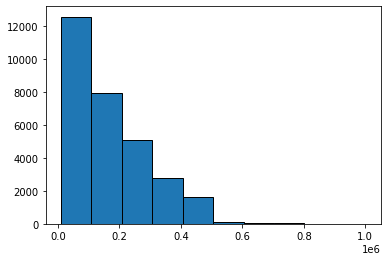

In [19]:
%matplotlib inline
plt.hist(credit['LIMIT_BAL'], edgecolor='black')
plt.show()

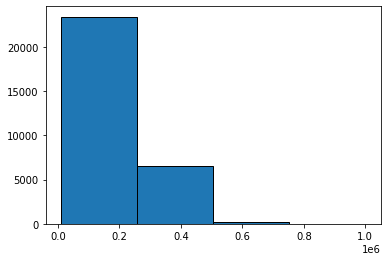

In [20]:
plt.hist(credit['LIMIT_BAL'], bins=4, edgecolor='black')
plt.show()

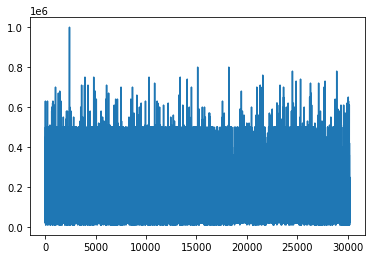

In [21]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [22]:
x = credit['PMT_SEPT']
y = credit['PMT_AUG']

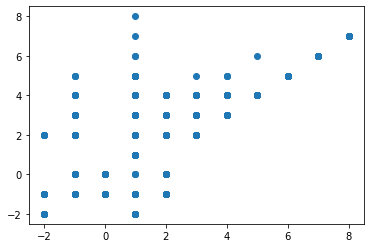

In [23]:
plt.scatter(x,y)
plt.show()

In [24]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PMT_SEPT', 'PMT_AUG', 'PMT_JUL',
       'PMT_JUN', 'PMT_MAY', 'PMT_APR', 'BILL_SEPT', 'BILL_AUG', 'BILL_JUL',
       'BILL_JUN', 'BILL_MAY', 'BILL_APR', 'PREV_PMT_SEPT', 'PREV_PMT_AUG',
       'PREV_PMT_JUL', 'PREV_PMT_JUN', 'PREV_PMT_MAY', 'PREV_PMT_APR',
       'SEX_female', 'SEX_male', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university',
       'CLIENT_BEHAVIOR_default', 'CLIENT_BEHAVIOR_not default'],
      dtype='object')


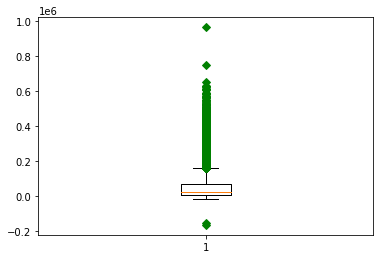

In [25]:
A = credit['BILL_SEPT']
plt.boxplot(A,0,'gD')
plt.show()

In [26]:
corr_mat = credit.corr()
corr_mat

,ID,LIMIT_BAL,MARRIAGE,AGE,PMT_SEPT,PMT_AUG,PMT_JUL,PMT_JUN,PMT_MAY,PMT_APR,...,PREV_PMT_MAY,PREV_PMT_APR,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,CLIENT_BEHAVIOR_default,CLIENT_BEHAVIOR_not default
ID,1.000000,0.025781,-0.030762,0.019679,-0.030847,-0.010728,-0.018823,-0.002375,-0.022670,-0.020165,...,0.000542,0.003685,0.020131,-0.020131,-0.027404,0.016931,0.037238,0.004453,-0.013980,0.013980
LIMIT_BAL,0.025781,1.000000,-0.109024,0.146340,-0.271197,-0.296601,-0.285772,-0.267111,-0.249155,-0.235144,...,0.216735,0.219727,0.024899,-0.024899,0.258690,-0.139714,0.012998,-0.147396,-0.153447,0.153447
MARRIAGE,-0.030762,-0.109024,1.000000,-0.414769,0.020399,0.024421,0.032552,0.033364,0.035837,0.034540,...,-0.001526,-0.007224,-0.031882,0.031882,0.142503,-0.109657,-0.008034,-0.053163,-0.024575,0.024575
AGE,0.019679,0.146340,-0.414769,1.000000,-0.039523,-0.050396,-0.053452,-0.049858,-0.053864,-0.048828,...,0.023410,0.020027,-0.090839,0.090839,-0.100056,0.230588,0.008935,-0.077472,0.014016,-0.014016
PMT_SEPT,-0.030847,-0.271197,0.020399,-0.039523,1.000000,0.671046,0.573129,0.538270,0.508541,0.473786,...,-0.058036,-0.058918,-0.057877,0.057877,-0.142750,0.059418,-0.024371,0.098722,0.324424,-0.324424
PMT_AUG,-0.010728,-0.296601,0.024421,-0.050396,0.671046,1.000000,0.766644,0.662888,0.623214,0.576278,...,-0.036810,-0.036442,-0.070866,0.070866,-0.170058,0.065539,-0.032843,0.122445,0.263082,-0.263082
PMT_JUL,-0.018823,-0.285772,0.032552,-0.053452,0.573129,0.766644,1.000000,0.777506,0.686727,0.632586,...,-0.035563,-0.035611,-0.066182,0.066182,-0.160294,0.063413,-0.034426,0.115060,0.234703,-0.234703
PMT_JUN,-0.002375,-0.267111,0.033364,-0.049858,0.538270,0.662888,0.777506,1.000000,0.820014,0.716631,...,-0.033783,-0.026512,-0.060341,0.060341,-0.152700,0.059130,-0.030710,0.110041,0.216200,-0.216200
PMT_MAY,-0.022670,-0.249155,0.035837,-0.053864,0.508541,0.623214,0.686727,0.820014,1.000000,0.816584,...,-0.033543,-0.023010,-0.055533,0.055533,-0.138769,0.050553,-0.028589,0.102533,0.204126,-0.204126
PMT_APR,-0.020165,-0.235144,0.034540,-0.048828,0.473786,0.576278,0.632586,0.716631,0.816584,1.000000,...,-0.046566,-0.025322,-0.044895,0.044895,-0.125273,0.042284,-0.035865,0.097544,0.186888,-0.186888


In [27]:
cov_mat = credit.cov()
cov_mat

,ID,LIMIT_BAL,MARRIAGE,AGE,PMT_SEPT,PMT_AUG,PMT_JUL,PMT_JUN,PMT_MAY,PMT_APR,...,PREV_PMT_MAY,PREV_PMT_APR,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,CLIENT_BEHAVIOR_default,CLIENT_BEHAVIOR_not default
ID,7.597102e+07,2.916637e+07,-139.943327,1581.795806,-302.101761,-111.981297,-196.434800,-24.193674,-223.959768,-202.209602,...,7.223415e+04,5.697014e+05,85.846935,-85.846935,-114.178918,54.638958,40.174976,19.364985,-50.581846,50.581846
LIMIT_BAL,2.916637e+07,1.684722e+10,-7385.897354,175167.428237,-39551.373507,-46102.145321,-44411.870218,-40525.124058,-36654.229299,-35113.742703,...,4.302912e+08,5.058687e+08,1581.137949,-1581.137949,16050.661424,-6714.304942,208.831926,-9545.188407,-8267.415214,8267.415214
MARRIAGE,-1.399433e+02,-7.385897e+03,0.272418,-1.996406,0.011963,0.015264,0.020343,0.020355,0.021200,0.020740,...,-1.218065e+01,-6.687454e+01,-0.008141,0.008141,0.035554,-0.021191,-0.000519,-0.013844,-0.005324,0.005324
AGE,1.581796e+03,1.751674e+05,-1.996406,85.045117,-0.409535,-0.556547,-0.590205,-0.537438,-0.563012,-0.518055,...,3.302153e+03,3.275840e+03,-0.409846,0.409846,-0.441080,0.787335,0.010199,-0.356454,0.053655,-0.053655
PMT_SEPT,-3.021018e+02,-3.955137e+04,0.011963,-0.409535,1.262484,0.902921,0.771046,0.706939,0.647634,0.612455,...,-9.974235e+02,-1.174217e+03,-0.031816,0.031816,-0.076672,0.024719,-0.003389,0.055343,0.151312,-0.151312
PMT_AUG,-1.119813e+02,-4.610215e+04,0.015264,-0.556547,0.902921,1.434063,1.099240,0.927883,0.845886,0.793953,...,-6.742426e+02,-7.740604e+02,-0.041519,0.041519,-0.097349,0.029059,-0.004868,0.073158,0.130775,-0.130775
PMT_JUL,-1.964348e+02,-4.441187e+04,0.020343,-0.590205,0.771046,1.099240,1.433606,1.088146,0.931944,0.871392,...,-6.513023e+02,-7.563014e+02,-0.038769,0.038769,-0.091745,0.028112,-0.005102,0.068735,0.116649,-0.116649
PMT_JUN,-2.419367e+01,-4.052512e+04,0.020355,-0.537438,0.706939,0.927883,1.088146,1.366274,1.086378,0.963704,...,-6.040022e+02,-5.496742e+02,-0.034507,0.034507,-0.085321,0.025590,-0.004443,0.064174,0.104900,-0.104900
PMT_MAY,-2.239598e+02,-3.665423e+04,0.021200,-0.563012,0.647634,0.845886,0.931944,1.086378,1.284640,1.064806,...,-5.815223e+02,-4.625867e+02,-0.030794,0.030794,-0.075185,0.021215,-0.004011,0.057981,0.096037,-0.096037
PMT_APR,-2.022096e+02,-3.511374e+04,0.020740,-0.518055,0.612455,0.793953,0.871392,0.963704,1.064806,1.323604,...,-8.194420e+02,-5.167275e+02,-0.025270,0.025270,-0.068895,0.018012,-0.005107,0.055990,0.089250,-0.089250


In [28]:
credit.to_csv('credit.csv')

In [29]:
credit.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PMT_SEPT,PMT_AUG,PMT_JUL,PMT_JUN,PMT_MAY,PMT_APR,...,PREV_PMT_MAY,PREV_PMT_APR,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,CLIENT_BEHAVIOR_default,CLIENT_BEHAVIOR_not default
1,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
2,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
3,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
4,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
5,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


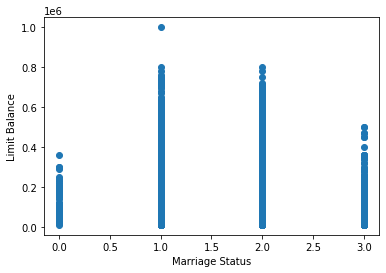

In [30]:
x = credit['MARRIAGE']
y = credit['LIMIT_BAL']

plt.scatter(x, y)
plt.xlabel('Marriage Status')
plt.ylabel('Limit Balance')

plt.show()

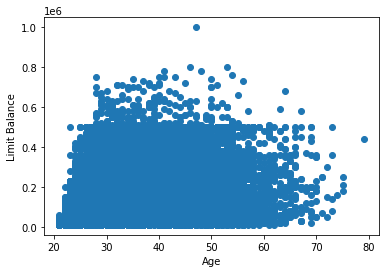

In [31]:
x = credit['AGE']
y = credit['LIMIT_BAL']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Limit Balance')

plt.show()

This credit dataset is not not working. Loading my other dataset for credit one to see if there is a difference in the way you preprocess a dataset.

In [32]:
df = pd.read_csv('Credit_One_Clean.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Amount_Credit   30201 non-null  int64
 1   Gender          30201 non-null  int64
 2   Education       30201 non-null  int64
 3   Marital_Status  30201 non-null  int64
 4   Age             30201 non-null  int64
 5   Pmt_SEPT        30201 non-null  int64
 6   Pmt_AUG         30201 non-null  int64
 7   Pmt_JUL         30201 non-null  int64
 8   Pmt_JUN         30201 non-null  int64
 9   Pmt_MAY         30201 non-null  int64
 10  Pmt_APR         30201 non-null  int64
 11  Owed_SEPT       30201 non-null  int64
 12  Owed_AUG        30201 non-null  int64
 13  Owed_JUL        30201 non-null  int64
 14  Owed_JUN        30201 non-null  int64
 15  Owed_MAY        30201 non-null  int64
 16  Owed_APR        30201 non-null  int64
 17  Prev_SEPT       30201 non-null  int64
 18  Prev_AUG        30201 non-

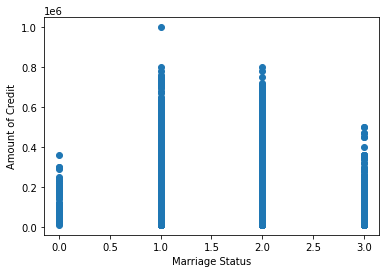

In [34]:
x = df['Marital_Status']
y = df['Amount_Credit']

plt.scatter(x, y)
plt.xlabel('Marriage Status')
plt.ylabel('Amount of Credit')
plt.show()

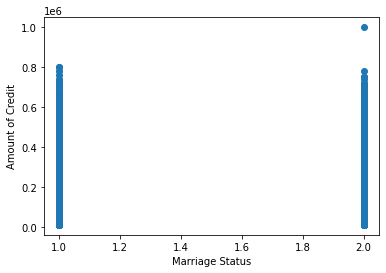

In [35]:
x = df['Gender']
y = df['Amount_Credit']

plt.scatter(x, y)
plt.xlabel('Marriage Status')
plt.ylabel('Amount of Credit')
plt.show()

In [36]:
X = df.iloc[:, 4:11]
y = df['Amount_Credit']
print('Summary of Features')
print(X)

Summary of Features
       Age  Pmt_SEPT  Pmt_AUG  Pmt_JUL  Pmt_JUN  Pmt_MAY  Pmt_APR
0       24         2        2       -1       -1       -2       -2
1       26        -1        2        0        0        0        2
2       34         0        0        0        0        0        0
3       37         0        0        0        0        0        0
4       57        -1        0       -1        0        0        0
...    ...       ...      ...      ...      ...      ...      ...
30196   39         0        0        0        0        0        0
30197   43        -1       -1       -1       -1        0        0
30198   37         4        3        2       -1        0        0
30199   41         1       -1        0        0        0       -1
30200   46         0        0        0        0        0        0

[30201 rows x 7 columns]


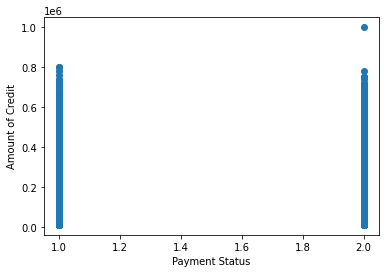

In [37]:
plt.scatter(x, y)
plt.xlabel('Payment Status')
plt.ylabel('Amount of Credit')
plt.show()

### Can we predict if a client will not be default on a credit balance increase with Linear Regression

This first test is on 'payment status' as Features and 'Amount of credit' as the Target.

In [38]:
# imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

In [39]:
model = LinearRegression(n_jobs=10)

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [40]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [41]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.12162560042985582
Linear Regression 0.11849456908478884
Support Vector Regression -0.054996517567619176


Amount owed per month as the features. Same target.

In [42]:
X = df.iloc[:, 11:17]
y = df['Amount_Credit']
print('Summary of Features')
print(X)

Summary of Features
       Owed_SEPT  Owed_AUG  Owed_JUL  Owed_JUN  Owed_MAY  Owed_APR
0           3913      3102       689         0         0         0
1           2682      1725      2682      3272      3455      3261
2          29239     14027     13559     14331     14948     15549
3          46990     48233     49291     28314     28959     29547
4           8617      5670     35835     20940     19146     19131
...          ...       ...       ...       ...       ...       ...
30196     188948    192815    208365     88004     31237     15980
30197       1683      1828      3502      8979      5190         0
30198       3565      3356      2758     20878     20582     19357
30199      -1645     78379     76304     52774     11855     48944
30200      47929     48905     49764     36535     32428     15313

[30201 rows x 6 columns]


In [43]:
model = LinearRegression(n_jobs=10)

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.32591805007693114
Linear Regression 0.08888356314310064
Support Vector Regression -0.051016542175466396


Previous payments as the features. Same target.

In [44]:
X = df.iloc[:, 17:23]
y = df['Amount_Credit']
print('Summary of Features')
print(X)

Summary of Features
       Prev_SEPT  Prev_AUG  Prev_JUL  PrevJUN  Prev_MAY  Prev_APR
0              0       689         0        0         0         0
1              0      1000      1000     1000         0      2000
2           1518      1500      1000     1000      1000      5000
3           2000      2019      1200     1100      1069      1000
4           2000     36681     10000     9000       689       679
...          ...       ...       ...      ...       ...       ...
30196       8500     20000      5003     3047      5000      1000
30197       1837      3526      8998      129         0         0
30198          0         0     22000     4200      2000      3100
30199      85900      3409      1178     1926     52964      1804
30200       2078      1800      1430     1000      1000      1000

[30201 rows x 6 columns]


In [45]:
model = LinearRegression(n_jobs=10)

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.28475333262083785
Linear Regression 0.11546958777044558
Support Vector Regression -0.052387088091682875


### Use Linear Regression to predict if a borrower will be in default.

In [46]:
default = df[df['Y'] == 1]
not_default = df[df['Y'] == 0]

In [47]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6682 entries, 0 to 30200
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Amount_Credit   6682 non-null   int64
 1   Gender          6682 non-null   int64
 2   Education       6682 non-null   int64
 3   Marital_Status  6682 non-null   int64
 4   Age             6682 non-null   int64
 5   Pmt_SEPT        6682 non-null   int64
 6   Pmt_AUG         6682 non-null   int64
 7   Pmt_JUL         6682 non-null   int64
 8   Pmt_JUN         6682 non-null   int64
 9   Pmt_MAY         6682 non-null   int64
 10  Pmt_APR         6682 non-null   int64
 11  Owed_SEPT       6682 non-null   int64
 12  Owed_AUG        6682 non-null   int64
 13  Owed_JUL        6682 non-null   int64
 14  Owed_JUN        6682 non-null   int64
 15  Owed_MAY        6682 non-null   int64
 16  Owed_APR        6682 non-null   int64
 17  Prev_SEPT       6682 non-null   int64
 18  Prev_AUG        6682 non-nu

In [48]:
X = df.iloc[:, 1:5]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age
0           2          2               1   24
1           2          2               2   26
2           2          2               2   34
3           2          2               1   37
4           1          2               1   57
...       ...        ...             ...  ...
30196       1          3               1   39
30197       1          3               2   43
30198       1          2               2   37
30199       1          3               1   41
30200       1          2               1   46

[30201 rows x 4 columns]


In [49]:
model = LinearRegression(n_jobs=10)

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.025458821627703337
Linear Regression 0.001235315244116945
Support Vector Regression -0.0856654014894278


In [50]:
X = df.iloc[:, 1:4]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status
0           2          2               1
1           2          2               2
2           2          2               2
3           2          2               1
4           1          2               1
...       ...        ...             ...
30196       1          3               1
30197       1          3               2
30198       1          2               2
30199       1          3               1
30200       1          2               1

[30201 rows x 3 columns]


In [51]:
model = LinearRegression(n_jobs=10)

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.005028796798837054
Linear Regression 0.0014341205679200646
Support Vector Regression -0.08560712972090105


In [52]:
X = df.iloc[:, 2:5]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Education  Marital_Status  Age
0              2               1   24
1              2               2   26
2              2               2   34
3              2               1   37
4              2               1   57
...          ...             ...  ...
30196          3               1   39
30197          3               2   43
30198          2               2   37
30199          3               1   41
30200          2               1   46

[30201 rows x 3 columns]


In [53]:
model = LinearRegression(n_jobs=10)

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.015070131089426194
Linear Regression -0.0002517207781761825
Support Vector Regression -0.08560171264838805


### Classifiers

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [55]:
X = df.iloc[:, 1:5]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age
0           2          2               1   24
1           2          2               2   26
2           2          2               2   34
3           2          2               1   37
4           1          2               1   57
...       ...        ...             ...  ...
30196       1          3               1   39
30197       1          3               2   43
30198       1          2               2   37
30199       1          3               1   41
30200       1          2               1   46

[30201 rows x 4 columns]


In [56]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(x_train, y_train)

# Predictions
preds = model.predict(x_test)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      7047
           1       0.27      0.01      0.02      2014

    accuracy                           0.77      9061
   macro avg       0.52      0.50      0.45      9061
weighted avg       0.67      0.77      0.68      9061

[[6988   59]
 [1992   22]]


In [57]:
# Normalized RMSE = RMSE / (max value – min value)

In [58]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = DecisionTreeClassifier(max_depth=200, class_weight='balanced')
model = algo.fit(x_train, y_train)

# Predictions
preds = model.predict(x_test)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


              precision    recall  f1-score   support

           0       0.80      0.55      0.65      7047
           1       0.25      0.52      0.33      2014

    accuracy                           0.54      9061
   macro avg       0.52      0.53      0.49      9061
weighted avg       0.68      0.54      0.58      9061

[[3870 3177]
 [ 973 1041]]


Split the Y column and make the default and not default even number of rows, then test the dataset and see if accuracy improves.

In [59]:
default.count()

Amount_Credit     6682
Gender            6682
Education         6682
Marital_Status    6682
Age               6682
Pmt_SEPT          6682
Pmt_AUG           6682
Pmt_JUL           6682
Pmt_JUN           6682
Pmt_MAY           6682
Pmt_APR           6682
Owed_SEPT         6682
Owed_AUG          6682
Owed_JUL          6682
Owed_JUN          6682
Owed_MAY          6682
Owed_APR          6682
Prev_SEPT         6682
Prev_AUG          6682
Prev_JUL          6682
PrevJUN           6682
Prev_MAY          6682
Prev_APR          6682
Y                 6682
dtype: int64

In [60]:
not_default.count()

Amount_Credit     23519
Gender            23519
Education         23519
Marital_Status    23519
Age               23519
Pmt_SEPT          23519
Pmt_AUG           23519
Pmt_JUL           23519
Pmt_JUN           23519
Pmt_MAY           23519
Pmt_APR           23519
Owed_SEPT         23519
Owed_AUG          23519
Owed_JUL          23519
Owed_JUN          23519
Owed_MAY          23519
Owed_APR          23519
Prev_SEPT         23519
Prev_AUG          23519
Prev_JUL          23519
PrevJUN           23519
Prev_MAY          23519
Prev_APR          23519
Y                 23519
dtype: int64

In [61]:
sample_not_default = not_default[::4]

In [62]:
sample_not_default.count()

Amount_Credit     5880
Gender            5880
Education         5880
Marital_Status    5880
Age               5880
Pmt_SEPT          5880
Pmt_AUG           5880
Pmt_JUL           5880
Pmt_JUN           5880
Pmt_MAY           5880
Pmt_APR           5880
Owed_SEPT         5880
Owed_AUG          5880
Owed_JUL          5880
Owed_JUN          5880
Owed_MAY          5880
Owed_APR          5880
Prev_SEPT         5880
Prev_AUG          5880
Prev_JUL          5880
PrevJUN           5880
Prev_MAY          5880
Prev_APR          5880
Y                 5880
dtype: int64

In [63]:
behavior = pd.concat([default, sample_not_default])

In [64]:
behavior

,Amount_Credit,Gender,Education,Marital_Status,Age,Pmt_SEPT,Pmt_AUG,Pmt_JUL,Pmt_JUN,Pmt_MAY,...,Owed_JUN,Owed_MAY,Owed_APR,Prev_SEPT,Prev_AUG,Prev_JUL,PrevJUN,Prev_MAY,Prev_APR,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30173,190000,1,1,1,37,0,0,0,0,0,...,29223,19616,148482,2000,3869,25128,10115,148482,4800,0
30180,180000,1,1,1,32,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
30185,30000,1,2,2,38,-1,-1,-2,-1,-1,...,1993,1907,3319,923,2977,1999,3057,3319,1000,0
30189,250000,1,1,1,34,0,0,0,0,0,...,245750,175005,179687,65000,8800,9011,6000,7000,6009,0


the default and the not default are close to the same size.

In [65]:
X = behavior.iloc[:, 1:5]
y = behavior['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age
0           2          2               1   24
1           2          2               2   26
13          1          2               2   30
16          1          1               2   24
21          2          2               1   39
...       ...        ...             ...  ...
30173       1          1               1   37
30180       1          1               1   32
30185       1          2               2   38
30189       1          1               1   34
30194       1          1               2   38

[12562 rows x 4 columns]


In [66]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = DecisionTreeClassifier(max_depth=200, class_weight='balanced')
model = algo.fit(x_train, y_train)

# Predictions
preds = model.predict(x_test)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.49      0.58      0.53      1735
           1       0.57      0.49      0.53      2034

    accuracy                           0.53      3769
   macro avg       0.53      0.53      0.53      3769
weighted avg       0.54      0.53      0.53      3769

[[ 999  736]
 [1039  995]]


Testing the remainder of the not default, not to indicate accuracy in the model. Just testing on known outcome. It should show all true.

In [67]:
sample = pd.concat([not_default, sample_not_default])
sample = sample.drop_duplicates()
X = sample.iloc[:, 1:5]
y = sample['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age
2           2          2               2   34
3           2          2               1   37
4           1          2               1   57
5           1          1               2   37
6           1          1               2   29
...       ...        ...             ...  ...
30191       1          2               1   41
30193       1          3               1   43
30194       1          1               2   38
30196       1          3               1   39
30197       1          3               2   43

[23335 rows x 4 columns]


In [68]:
preds = model.predict(X)
print(classification_report(y, preds))
print(confusion_matrix(y, preds))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73     23335
           1       0.00      0.00      0.00         0

    accuracy                           0.58     23335
   macro avg       0.50      0.29      0.37     23335
weighted avg       1.00      0.58      0.73     23335

[[13508  9827]
 [    0     0]]


C:\Users\N1OVU\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now testing features with both default and not default in the mix.

In [69]:
X = df.iloc[:, 1:5]
y = df['Y']
print('Summary of Features')
print(X)

preds = model.predict(X)
print(classification_report(y, preds))
print(confusion_matrix(y, preds))

Summary of Features
       Gender  Education  Marital_Status  Age
0           2          2               1   24
1           2          2               2   26
2           2          2               2   34
3           2          2               1   37
4           1          2               1   57
...       ...        ...             ...  ...
30196       1          3               1   39
30197       1          3               2   43
30198       1          2               2   37
30199       1          3               1   41
30200       1          2               1   46

[30201 rows x 4 columns]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68     23519
           1       0.27      0.55      0.36      6682

    accuracy                           0.57     30201
   macro avg       0.54      0.56      0.52     30201
weighted avg       0.70      0.57      0.61     30201

[[13625  9894]
 [ 3034  3648]]


#### Random Forest Clasifier

In [70]:
# all rows in dataframe
X = df.iloc[:, 1:5]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age
0           2          2               1   24
1           2          2               2   26
2           2          2               2   34
3           2          2               1   37
4           1          2               1   57
...       ...        ...             ...  ...
30196       1          3               1   39
30197       1          3               2   43
30198       1          2               2   37
30199       1          3               1   41
30200       1          2               1   46

[30201 rows x 4 columns]


In [71]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = RandomForestClassifier()
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      7047
           1       0.24      0.01      0.02      2014

    accuracy                           0.77      9061
   macro avg       0.51      0.50      0.45      9061
weighted avg       0.66      0.77      0.68      9061

[[6973   74]
 [1990   24]]


In [72]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced')
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68      7047
           1       0.26      0.51      0.34      2014

    accuracy                           0.57      9061
   macro avg       0.53      0.55      0.51      9061
weighted avg       0.68      0.57      0.60      9061

[[4123 2924]
 [ 992 1022]]


Default and not default are close to the same number of rows.

In [73]:
X = behavior.iloc[:, 1:5]
y = behavior['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age
0           2          2               1   24
1           2          2               2   26
13          1          2               2   30
16          1          1               2   24
21          2          2               1   39
...       ...        ...             ...  ...
30173       1          1               1   37
30180       1          1               1   32
30185       1          2               2   38
30189       1          1               1   34
30194       1          1               2   38

[12562 rows x 4 columns]


In [74]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced')
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53      1735
           1       0.58      0.52      0.55      2034

    accuracy                           0.54      3769
   macro avg       0.54      0.54      0.54      3769
weighted avg       0.55      0.54      0.54      3769

[[ 971  764]
 [ 967 1067]]


Balance of the not default dataset.

In [75]:
sample = pd.concat([not_default, sample_not_default])
sample = sample.drop_duplicates()
X = sample.iloc[:, 1:5]
y = sample['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age
2           2          2               2   34
3           2          2               1   37
4           1          2               1   57
5           1          1               2   37
6           1          1               2   29
...       ...        ...             ...  ...
30191       1          2               1   41
30193       1          3               1   43
30194       1          1               2   38
30196       1          3               1   39
30197       1          3               2   43

[23335 rows x 4 columns]


In [76]:
# Predictions
preds = model.predict(X)
print(classification_report(y, preds))
print(confusion_matrix(y, preds))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     23335
           1       0.00      0.00      0.00         0

    accuracy                           0.55     23335
   macro avg       0.50      0.27      0.35     23335
weighted avg       1.00      0.55      0.71     23335

[[12805 10530]
 [    0     0]]


C:\Users\N1OVU\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the default and the not default are close to the same size.

In [77]:
X = behavior.iloc[:, 1:5]
y = behavior['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age
0           2          2               1   24
1           2          2               2   26
13          1          2               2   30
16          1          1               2   24
21          2          2               1   39
...       ...        ...             ...  ...
30173       1          1               1   37
30180       1          1               1   32
30185       1          2               2   38
30189       1          1               1   34
30194       1          1               2   38

[12562 rows x 4 columns]


In [78]:
algos_class = []
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [79]:
# classification
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [80]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.5304884845811085
Decision Tree Classifier 0.5302495550462548
Gradient Boosting Classifier 0.5468868559443288


In [81]:
# 1 = generation Z; 2 = millenials; 3 = generation X; 4 = baby boomers; 5 = silent generation

new_column = []

for age in df['Age']:
    if age <= 24:
        new_column.append(1)
    elif age > 24 and age <= 40:
        new_column.append(2)
    elif age > 40 and age <= 56:
        new_column.append(3)
    elif age > 56 and age <= 75:
        new_column.append(4)
    else:
        new_column.append(5)

df['Age_group'] = new_column

In [82]:
df

,Amount_Credit,Gender,Education,Marital_Status,Age,Pmt_SEPT,Pmt_AUG,Pmt_JUL,Pmt_JUN,Pmt_MAY,...,Owed_MAY,Owed_APR,Prev_SEPT,Prev_AUG,Prev_JUL,PrevJUN,Prev_MAY,Prev_APR,Y,Age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,2
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,2
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30196,220000,1,3,1,39,0,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,2
30197,150000,1,3,2,43,-1,-1,-1,-1,0,...,5190,0,1837,3526,8998,129,0,0,0,3
30198,30000,1,2,2,37,4,3,2,-1,0,...,20582,19357,0,0,22000,4200,2000,3100,1,2
30199,80000,1,3,1,41,1,-1,0,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,3


In [83]:
X = df[['Gender', 'Education', 'Marital_Status', 'Age_group']]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age_group
0           2          2               1          1
1           2          2               2          2
2           2          2               2          2
3           2          2               1          2
4           1          2               1          4
...       ...        ...             ...        ...
30196       1          3               1          2
30197       1          3               2          3
30198       1          2               2          2
30199       1          3               1          3
30200       1          2               1          3

[30201 rows x 4 columns]


In [84]:
algos_class = []
algos_class.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced')))
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=10, class_weight='balanced')))
algos_class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=200, max_depth=5)))

# classification
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.5439223866759378
Decision Tree Classifier 0.5422999238435814
Gradient Boosting Classifier 0.7784841561537698


In [85]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = GradientBoostingClassifier(n_estimators=200, max_depth=5)
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      7047
           1       0.33      0.00      0.00      2014

    accuracy                           0.78      9061
   macro avg       0.56      0.50      0.44      9061
weighted avg       0.68      0.78      0.68      9061

[[7045    2]
 [2013    1]]


Demographics are working. Now add credit score to the variables.

In [86]:
get_rating = df[['Pmt_SEPT', 'Pmt_AUG', 'Pmt_JUL', 'Pmt_JUN', 'Pmt_MAY', 'Pmt_APR']]
# get_rating = df[['Pmt_SEPT', 'Pmt_AUG']]
get_rating

,Pmt_SEPT,Pmt_AUG,Pmt_JUL,Pmt_JUN,Pmt_MAY,Pmt_APR
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
30196,0,0,0,0,0,0
30197,-1,-1,-1,-1,0,0
30198,4,3,2,-1,0,0
30199,1,-1,0,0,0,-1


Try to make a usable one column credit rating

In [87]:
credit_rating = get_rating.sum(axis=1)
credit_rating

0       -2
1        3
2        0
3        0
4       -2
        ..
30196    0
30197   -4
30198    8
30199   -1
30200    0
Length: 30201, dtype: int64

Try to use previous payments.

In [88]:
previous = df[['Prev_SEPT', 'Prev_AUG', 'Prev_JUL', 'PrevJUN', 'Prev_MAY', 'Prev_APR']]
previous

,Prev_SEPT,Prev_AUG,Prev_JUL,PrevJUN,Prev_MAY,Prev_APR
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
30196,8500,20000,5003,3047,5000,1000
30197,1837,3526,8998,129,0,0
30198,0,0,22000,4200,2000,3100
30199,85900,3409,1178,1926,52964,1804


Use payment status and demographics.

In [89]:
X = df[['Gender', 'Education', 'Marital_Status', 'Age_group', 'Pmt_SEPT', 'Pmt_AUG', 'Pmt_JUL', 'Pmt_JUN', 'Pmt_MAY', 'Pmt_APR']]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age_group  Pmt_SEPT  Pmt_AUG  \
0           2          2               1          1         2        2   
1           2          2               2          2        -1        2   
2           2          2               2          2         0        0   
3           2          2               1          2         0        0   
4           1          2               1          4        -1        0   
...       ...        ...             ...        ...       ...      ...   
30196       1          3               1          2         0        0   
30197       1          3               2          3        -1       -1   
30198       1          2               2          2         4        3   
30199       1          3               1          3         1       -1   
30200       1          2               1          3         0        0   

       Pmt_JUL  Pmt_JUN  Pmt_MAY  Pmt_APR  
0           -1       -1       -2       -2  
1  

In [90]:
algos_class = []
algos_class.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced')))
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=10, class_weight='balanced')))
algos_class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=200, max_depth=5)))

# classification
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.7863978013973046
Decision Tree Classifier 0.76659713254528
Gradient Boosting Classifier 0.8178537134531969


Adding payment history to the mix.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Amount_Credit   30201 non-null  int64
 1   Gender          30201 non-null  int64
 2   Education       30201 non-null  int64
 3   Marital_Status  30201 non-null  int64
 4   Age             30201 non-null  int64
 5   Pmt_SEPT        30201 non-null  int64
 6   Pmt_AUG         30201 non-null  int64
 7   Pmt_JUL         30201 non-null  int64
 8   Pmt_JUN         30201 non-null  int64
 9   Pmt_MAY         30201 non-null  int64
 10  Pmt_APR         30201 non-null  int64
 11  Owed_SEPT       30201 non-null  int64
 12  Owed_AUG        30201 non-null  int64
 13  Owed_JUL        30201 non-null  int64
 14  Owed_JUN        30201 non-null  int64
 15  Owed_MAY        30201 non-null  int64
 16  Owed_APR        30201 non-null  int64
 17  Prev_SEPT       30201 non-null  int64
 18  Prev_AUG        30201 non-

In [106]:
# added payment history in the mix.
X = df[['Gender', 'Education', 'Marital_Status', 'Age_group', 'Pmt_SEPT', 'Pmt_AUG', 'Pmt_JUL', 'Pmt_JUN', 'Pmt_MAY', 'Pmt_APR', 'Prev_SEPT', 'Prev_AUG', 'Prev_JUL', 'PrevJUN', 'Prev_MAY', 'Prev_APR']]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age_group  Pmt_SEPT  Pmt_AUG  \
0           2          2               1          1         2        2   
1           2          2               2          2        -1        2   
2           2          2               2          2         0        0   
3           2          2               1          2         0        0   
4           1          2               1          4        -1        0   
...       ...        ...             ...        ...       ...      ...   
30196       1          3               1          2         0        0   
30197       1          3               2          3        -1       -1   
30198       1          2               2          2         4        3   
30199       1          3               1          3         1       -1   
30200       1          2               1          3         0        0   

       Pmt_JUL  Pmt_JUN  Pmt_MAY  Pmt_APR  Prev_SEPT  Prev_AUG  Prev_JUL  \
0           -1 

In [107]:
algos_class = []
algos_class.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced')))
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=10, class_weight='balanced')))
algos_class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=200, max_depth=5)))

# classification
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.7848084500513228
Decision Tree Classifier 0.7329227509022881
Gradient Boosting Classifier 0.8166285884573359


In [108]:
# added discrete ages back in.
X = df[['Gender', 'Education', 'Marital_Status', 'Age', 'Pmt_SEPT', 'Pmt_AUG', 'Pmt_JUL', 'Pmt_JUN', 'Pmt_MAY', 'Pmt_APR', 'Prev_SEPT', 'Prev_AUG', 'Prev_JUL', 'PrevJUN', 'Prev_MAY', 'Prev_APR']]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age  Pmt_SEPT  Pmt_AUG  Pmt_JUL  \
0           2          2               1   24         2        2       -1   
1           2          2               2   26        -1        2        0   
2           2          2               2   34         0        0        0   
3           2          2               1   37         0        0        0   
4           1          2               1   57        -1        0       -1   
...       ...        ...             ...  ...       ...      ...      ...   
30196       1          3               1   39         0        0        0   
30197       1          3               2   43        -1       -1       -1   
30198       1          2               2   37         4        3        2   
30199       1          3               1   41         1       -1        0   
30200       1          2               1   46         0        0        0   

       Pmt_JUN  Pmt_MAY  Pmt_APR  Prev_SEPT  Prev_AUG  

In [109]:
algos_class = []
algos_class.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced')))
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=10, class_weight='balanced')))
algos_class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=200, max_depth=5)))

# classification
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.7852720108605675
Decision Tree Classifier 0.7316314029336777
Gradient Boosting Classifier 0.8175225985894506


The Gradient Boosting Classifier appears to be an improvement on the model Credit One is currently using.

In [111]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7047
           1       0.66      0.36      0.47      2014

    accuracy                           0.82      9061
   macro avg       0.75      0.65      0.68      9061
weighted avg       0.80      0.82      0.80      9061

[[6679  368]
 [1289  725]]


In [112]:
df.head(2)

,Amount_Credit,Gender,Education,Marital_Status,Age,Pmt_SEPT,Pmt_AUG,Pmt_JUL,Pmt_JUN,Pmt_MAY,...,Owed_MAY,Owed_APR,Prev_SEPT,Prev_AUG,Prev_JUL,PrevJUN,Prev_MAY,Prev_APR,Y,Age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,2


In [113]:
# adding Amount_Credit
X = df[['Amount_Credit', 'Gender', 'Education', 'Marital_Status', 'Age', 'Pmt_SEPT', 'Pmt_AUG', 'Pmt_JUL', 'Pmt_JUN', 'Pmt_MAY', 'Pmt_APR', 'Prev_SEPT', 'Prev_AUG', 'Prev_JUL', 'PrevJUN', 'Prev_MAY', 'Prev_APR']]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Amount_Credit  Gender  Education  Marital_Status  Age  Pmt_SEPT  \
0              20000       2          2               1   24         2   
1             120000       2          2               2   26        -1   
2              90000       2          2               2   34         0   
3              50000       2          2               1   37         0   
4              50000       1          2               1   57        -1   
...              ...     ...        ...             ...  ...       ...   
30196         220000       1          3               1   39         0   
30197         150000       1          3               2   43        -1   
30198          30000       1          2               2   37         4   
30199          80000       1          3               1   41         1   
30200          50000       1          2               1   46         0   

       Pmt_AUG  Pmt_JUL  Pmt_JUN  Pmt_MAY  Pmt_APR  Prev_SEPT  Prev_AUG  \
0            2  

In [114]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7047
           1       0.67      0.36      0.47      2014

    accuracy                           0.82      9061
   macro avg       0.75      0.66      0.68      9061
weighted avg       0.80      0.82      0.80      9061

[[6679  368]
 [1283  731]]


In [117]:
# All variables
X = df.drop(columns=['Y', 'Age_group'])
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Amount_Credit  Gender  Education  Marital_Status  Age  Pmt_SEPT  \
0              20000       2          2               1   24         2   
1             120000       2          2               2   26        -1   
2              90000       2          2               2   34         0   
3              50000       2          2               1   37         0   
4              50000       1          2               1   57        -1   
...              ...     ...        ...             ...  ...       ...   
30196         220000       1          3               1   39         0   
30197         150000       1          3               2   43        -1   
30198          30000       1          2               2   37         4   
30199          80000       1          3               1   41         1   
30200          50000       1          2               1   46         0   

       Pmt_AUG  Pmt_JUL  Pmt_JUN  Pmt_MAY  ...  Owed_JUL  Owed_JUN  Owed_MAY  \
0          

In [118]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7047
           1       0.67      0.36      0.47      2014

    accuracy                           0.82      9061
   macro avg       0.75      0.65      0.68      9061
weighted avg       0.80      0.82      0.80      9061

[[6683  364]
 [1290  724]]


In [121]:
# All variables except Amount_Credit
X = df.drop(columns=['Amount_Credit', 'Y', 'Age_group'])
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age  Pmt_SEPT  Pmt_AUG  Pmt_JUL  \
0           2          2               1   24         2        2       -1   
1           2          2               2   26        -1        2        0   
2           2          2               2   34         0        0        0   
3           2          2               1   37         0        0        0   
4           1          2               1   57        -1        0       -1   
...       ...        ...             ...  ...       ...      ...      ...   
30196       1          3               1   39         0        0        0   
30197       1          3               2   43        -1       -1       -1   
30198       1          2               2   37         4        3        2   
30199       1          3               1   41         1       -1        0   
30200       1          2               1   46         0        0        0   

       Pmt_JUN  Pmt_MAY  Pmt_APR  ...  Owed_JUL  Owed_J

In [120]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=123)

# Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7047
           1       0.67      0.36      0.47      2014

    accuracy                           0.82      9061
   macro avg       0.75      0.65      0.68      9061
weighted avg       0.80      0.82      0.80      9061

[[6681  366]
 [1287  727]]


In [123]:
X = df.drop(columns=['Amount_Credit', 'Y', 'Age'])
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Pmt_SEPT  Pmt_AUG  Pmt_JUL  Pmt_JUN  \
0           2          2               1         2        2       -1       -1   
1           2          2               2        -1        2        0        0   
2           2          2               2         0        0        0        0   
3           2          2               1         0        0        0        0   
4           1          2               1        -1        0       -1        0   
...       ...        ...             ...       ...      ...      ...      ...   
30196       1          3               1         0        0        0        0   
30197       1          3               2        -1       -1       -1       -1   
30198       1          2               2         4        3        2       -1   
30199       1          3               1         1       -1        0        0   
30200       1          2               1         0        0        0        0   

       

In [124]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=123)

# Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9414
           1       0.66      0.35      0.46      2667

    accuracy                           0.82     12081
   macro avg       0.75      0.65      0.67     12081
weighted avg       0.80      0.82      0.79     12081

[[8936  478]
 [1734  933]]


In [125]:
# added discrete ages back in.
X = df[['Gender', 'Education', 'Marital_Status', 'Age', 'Pmt_SEPT', 'Pmt_AUG', 'Pmt_JUL', 'Pmt_JUN', 'Pmt_MAY', 'Pmt_APR', 'Prev_SEPT', 'Prev_AUG', 'Prev_JUL', 'PrevJUN', 'Prev_MAY', 'Prev_APR']]
y = df['Y']
print('Summary of Features')
print(X)

Summary of Features
       Gender  Education  Marital_Status  Age  Pmt_SEPT  Pmt_AUG  Pmt_JUL  \
0           2          2               1   24         2        2       -1   
1           2          2               2   26        -1        2        0   
2           2          2               2   34         0        0        0   
3           2          2               1   37         0        0        0   
4           1          2               1   57        -1        0       -1   
...       ...        ...             ...  ...       ...      ...      ...   
30196       1          3               1   39         0        0        0   
30197       1          3               2   43        -1       -1       -1   
30198       1          2               2   37         4        3        2   
30199       1          3               1   41         1       -1        0   
30200       1          2               1   46         0        0        0   

       Pmt_JUN  Pmt_MAY  Pmt_APR  Prev_SEPT  Prev_AUG  

In [129]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

# Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7047
           1       0.66      0.36      0.47      2014

    accuracy                           0.82      9061
   macro avg       0.75      0.65      0.68      9061
weighted avg       0.80      0.82      0.80      9061

[[6679  368]
 [1289  725]]
